# Obtaining the MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)

In [3]:
X, y = mnist.data, mnist.target

In [4]:
print(f"Shape of the training data: {X.shape}")

Shape of the training data: (70000, 784)


In [5]:
# Utility function to print an image from the dataset
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [6]:
random_digit_idx = 123
random_digit = X[random_digit_idx]
print(f"random_digit looks like this: {random_digit.shape}")
print("There is one row 784 values. Each value represents the intensity of a specific pixel.")

random_digit looks like this: (784,)
There is one row 784 values. Each value represents the intensity of a specific pixel.


The image looks like the below, and based on the label it is actually a 7


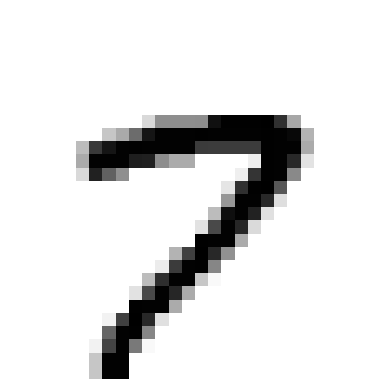

In [7]:
plot_digit(random_digit)
print(f"The image looks like the below, and based on the label it is actually a {y[123]}")

In [8]:
# Splitting into training and test set
# MNIST automatically handles the shuffling and any stratification by default
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier (7 or Not 7)

In [9]:
y_train_7 = (y_train == '7')
print(y_train_7.shape) # we see that it maintains the same shape, but just has false 
# for every instance that is not a 7

idx_7 = []
idx_not_7 = []
for i in range(len(y_train_7)):
    if y_train_7[i] == True:
        idx_7.append(i)
    else:
        idx_not_7.append(i)

print(f"Total number of 7s: {len(idx_7)}")
print(f"Total number of not 7s: {len(idx_not_7)}")

(60000,)
Total number of 7s: 6265
Total number of not 7s: 53735


### How a Stochastic Gradient (SGD) classifier works
- Computes a score based on a decision function.
- If that score is greater than some threshold, it assigns the instance to the positive class. 
- Otherwise, it assigns the negative class.

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)
# 7 will be the positive class 

SGDClassifier(random_state=42)

In [12]:
# Testing if the model can correctly identify our random digit
print(f"The model identifies our random_digit as:\
 {'7' if sgd_clf.predict([random_digit]) == False else 'Not 7.'}")

print(f"The random digit is actually a {y_train[random_digit_idx]}")

The model identifies our random_digit as: Not 7.
The random digit is actually a 7


In [15]:
# Incorrect result for the random digit, so let us try a few more.
import numpy as np

rand_idxs = np.random.randint(1, 60000, size=20) #generate 20 random from the train set
for rand_idx in rand_idxs:
    if sgd_clf.predict([X_train[rand_idx]])[0] == False:
        print(f"Model prediction: Not a 7.")
    else:
        print(f"Model Prediction: 7")
    print(f"This instance is actually a: {y_train[rand_idx]}")
    print('*'*50)

Model Prediction: 7
This instance is actually a: 7
**************************************************
Model prediction: Not a 7.
This instance is actually a: 5
**************************************************
Model Prediction: 7
This instance is actually a: 7
**************************************************
Model prediction: Not a 7.
This instance is actually a: 6
**************************************************
Model prediction: Not a 7.
This instance is actually a: 1
**************************************************
Model prediction: Not a 7.
This instance is actually a: 8
**************************************************
Model prediction: Not a 7.
This instance is actually a: 3
**************************************************
Model Prediction: 7
This instance is actually a: 7
**************************************************
Model prediction: Not a 7.
This instance is actually a: 6
**************************************************
Model prediction: Not a 7.
This instance

# Measuring Accuracy Using Cross-Validation
- At a glance, the model does not seem to be doing too poorly. 
- But we can use cross validation to get a measure of the accuracy.

In [16]:
from sklearn.model_selection import cross_val_score

# Use 3 folds to 
accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring='accuracy')

Fold 1 accuracy: 0.98105
Fold 2 accuracy: 0.9735
Fold 3 accuracy: 0.95335


In [21]:
print("SGD Classifier:")
for i in range(len(accuracy_scores)):
    print(f"- Fold {i+1} accuracy: {round(accuracy_scores[i]*100, 2)}%")

SGD Classifier:
- Fold 1 accuracy: 98.1%
- Fold 2 accuracy: 97.35%
- Fold 3 accuracy: 95.34%


## The Potential Problem with the Accuracy Metric
- >95% accuracy makes it seem like the model is performing really well.
- However, this just gives the percentage of classifications that are correct. 
- But, as shown below, the DummyClassifier ALWAYS predicts negative. Since only a small percentage of the 60,000 instances are 7s (10.44%), predicting False (value not a 7) will be correct the vast majority of the time.

In [22]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_7)
print(any(dummy_clf.predict(X_train))) # Check if any items in the list are true

# Evaluate the dummy classifier (which always predicts false) 's accuracy
dummy_accuracy_scores = cross_val_score(dummy_clf, X_train, y_train_7, cv=3, scoring='accuracy')


False


In [24]:
print("Dummy Classifier:")
for i in range(len(dummy_accuracy_scores)):
    print(f"- Fold {i+1} accuracy: {round(dummy_accuracy_scores[i]*100, 2)}%")

Dummy Classifier:
- Fold 1 accuracy: 89.56%
- Fold 2 accuracy: 89.56%
- Fold 3 accuracy: 89.56%


# Confusion Matrices

In [25]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns the PREDICTIONS made on each fold (instead of the score)
y_train_7_predictions = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

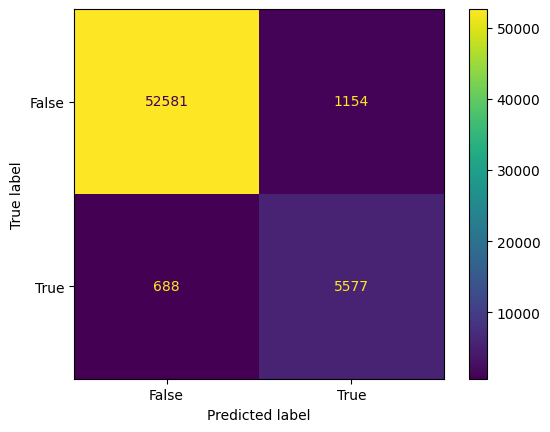

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train_7, y_train_7_predictions)
plt.show()